# Sales Analysis
### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
pd.options.mode.chained_assignment = None

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import os 

In [4]:
# Reading CSV files and concatenating them together

os.chdir(os.getcwd() + '\Sales_Data')
names = os.listdir()

li = []
for name in names:
    if name.endswith('.csv'):
        df = pd.read_csv(name)
        li.append(df)

df = pd.concat(li, ignore_index=True)

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Save the updated data into one file

In [4]:
# I used .Parquet format because of how fast you can read and write from it
df.to_parquet('all_sales.parquet')

### Read in Updated data

In [5]:
sales_dataframe = pd.read_parquet('all_sales.parquet')
sales_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Exploring the data we have 

In [6]:
sales_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Cleaning
#### Dropping empty rows and duplicates

In [7]:
sales_dataframe.dropna(how='all', inplace=True)
sales_dataframe.drop_duplicates(inplace=True)

In [8]:
sales_dataframe.info()
sales_dataframe.describe()


# looking at the unique quantity ordered values
q = sales_dataframe['Quantity Ordered'].unique()
q

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [9]:

# As i expected the header remained when we concatenated the csv files so we will have to remove any rows that are headers
# sales_dataframe[sales_dataframe['Quantity Ordered'] == 'Quantity Ordered']

sales_dataframe = sales_dataframe[sales_dataframe['Quantity Ordered'] != 'Quantity Ordered']

### Data Transformation
1. Change the data types of the columns
1. Parse down the address column
1. Add a total order price column
1. Add a Month column

In [10]:
# Changing the data types
sales_dataframe['Quantity Ordered'] = sales_dataframe['Quantity Ordered'].astype(int)
sales_dataframe['Price Each'] = sales_dataframe['Price Each'].astype(float)
sales_dataframe['Order Date'] = sales_dataframe['Order Date'].astype('datetime64')


In [11]:
# Parsing the address column into street,city,state,zip

sales_dataframe['street'] = sales_dataframe['Purchase Address'].str.split(',' , expand=True)[0].str.strip()
sales_dataframe['city'] = sales_dataframe['Purchase Address'].str.split(',' , expand=True)[1].str.strip()
sales_dataframe['state'] = sales_dataframe['Purchase Address'].str.split(',' , expand=True)[2].str.strip()

In [12]:
sales_dataframe['zip'] = sales_dataframe['state'].str.split(expand=True)[1].str.strip()
sales_dataframe['state'] = sales_dataframe['state'].str.split(expand=True)[0].str.strip()
# Adding total order price column
sales_dataframe['order price'] = sales_dataframe['Quantity Ordered']*sales_dataframe['Price Each']

In [13]:
# Adding month column

sales_dataframe['month'] = sales_dataframe['Order Date'].dt.month

In [14]:
sales_dataframe.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,street,city,state,zip,order price,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,02215,99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001,11.99,4


## Questions we want to answer
-  What month has the highest sales.
-  What is the most popular product and what is its % of the total revenue and why is it popular.
-  Which city is the most profitable and what is its % of total revenue.
-  What is the best time to show advertisement
-  Which Products are most sold together

**Q1:** What month has the highest sales ?

In [15]:
month_group = sales_dataframe.groupby('month').sum()
month_group

# December has the highest sales generated 

,Quantity Ordered,Price Each,order price
month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


In [16]:
#December revenue % to total revenue
total_revenue = month_group['order price'].sum()
dec_revenue = month_group['order price'].iloc[-1]

print(dec_revenue/total_revenue*100)

13.370734871518444


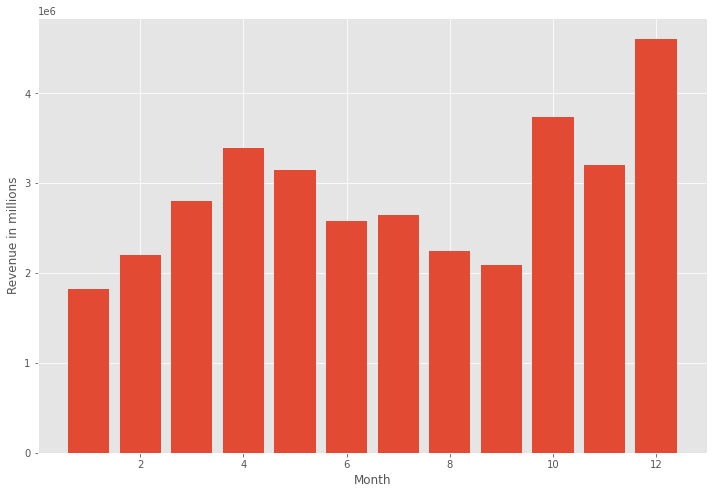

In [17]:
plt.bar(month_group.index ,month_group['order price'])
plt.xlabel('Month')
plt.ylabel('Revenue in millions')
plt.show()

**Q2:** What is the most popular product and what is its % of the total revenue and why is it popular?

In [18]:
product_group = sales_dataframe.groupby('Product').sum()
product_group
# it appears that Triple A batteries are the most popular product 

,Quantity Ordered,Price Each,order price,month
Product,,,,
20in Monitor,4126,450739.02,453818.74,29319
27in 4K Gaming Monitor,6239,2427687.75,2433147.61,44396
27in FHD Monitor,7541,1124625.02,1131074.59,52484
34in Ultrawide Monitor,6192,2346058.26,2352898.08,43258
AA Batteries (4-pack),27615,78942.72,106041.60,145423
AAA Batteries (4-pack),30986,61629.88,92648.14,146149
Apple Airpods Headphones,15637,2328750.00,2345550.00,109304
Bose SoundSport Headphones,13430,1329667.02,1342865.70,93918
Flatscreen TV,4813,1438200.00,1443900.00,34172


In [19]:
# calculating The % revenue the triple A batteries made

product_group['product'] = product_group.index
highest_item_sale = product_group[product_group['product'] == 'AAA Batteries (4-pack)']
print(highest_item_sale['order price'].iloc[0]/total_revenue*100)

0.2688138515675812


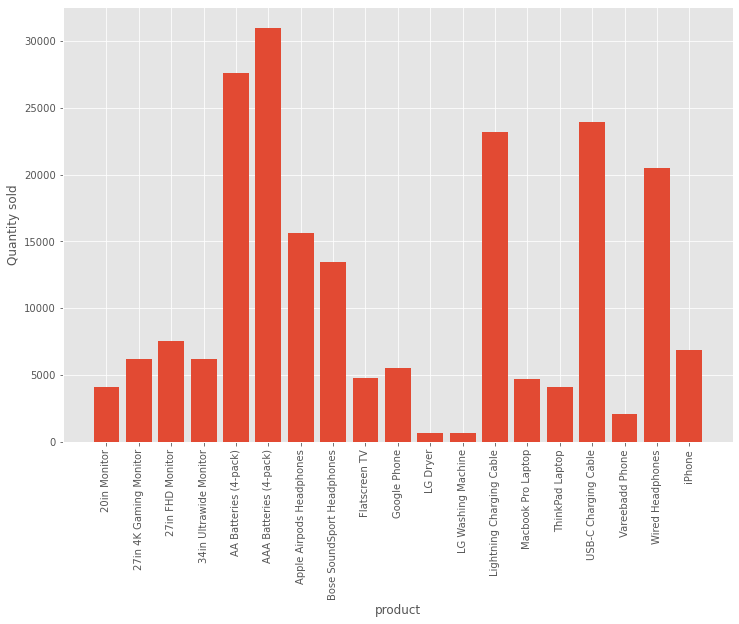

In [20]:
plt.bar(product_group.index,product_group['Quantity Ordered'])
plt.xticks(product_group.index , rotation = 90)
plt.xlabel('product')
plt.ylabel('Quantity sold')
plt.show()
# our theory is that the reason why triple A batteries had high sales was for the fact that its cheap 
# so we will plot the quntity and the price of each product next

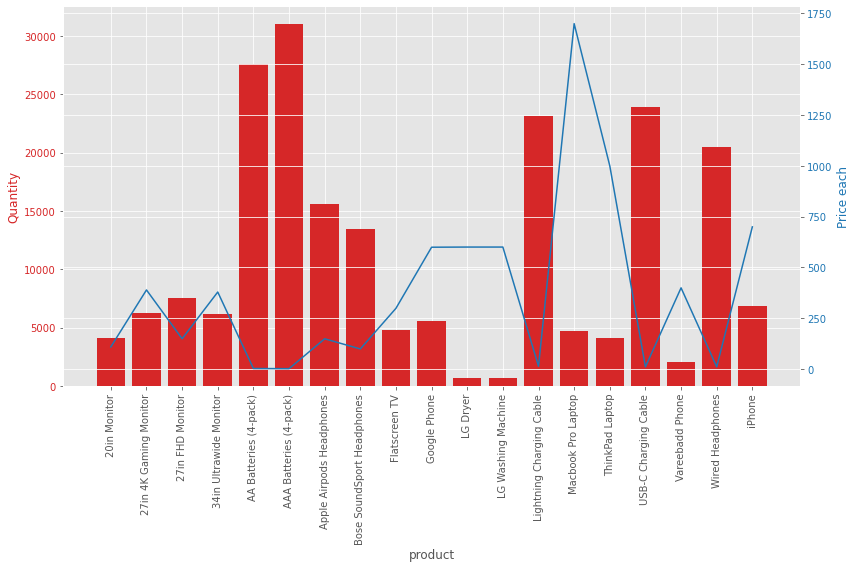

In [21]:
# Quantity vs Price

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('product')
ax1.set_ylabel('Quantity', color=color)
ax1.bar(product_group.index, product_group['Quantity Ordered'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Price each', color=color)  # we already handled the x-label with ax1
ax2.plot(product_group.index, product_group['Price Each']/product_group['Quantity Ordered'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x',rotation = 90)

fig.tight_layout()  
plt.show()
# As we thought The Quantity ordered somewhat has a negative correlation with the the item price
# But that doesnt have to be always true as we can see that the revenue that laptops generated were more than that of the
# dryers or the washing machines

**Q3:** Which city is the most profitable and what is its % of total revenue?

In [22]:
city_group = sales_dataframe.groupby('city').sum()
city_group

# we see that San Francisco has the most sales 

,Quantity Ordered,Price Each,order price,month
city,,,,
Atlanta,16584,2778608.69,2794199.07,104649
Austin,11137,1808340.03,1818044.33,69720
Boston,22494,3634398.40,3658627.65,140898
Dallas,16707,2750026.38,2765373.96,104447
Los Angeles,33247,5417171.70,5448304.28,208020
New York City,27903,4632920.54,4661867.14,175557
Portland,14037,2306588.80,2319331.94,87636
San Francisco,50169,8204001.38,8254743.55,314949
Seattle,16534,2730586.55,2745046.02,104817


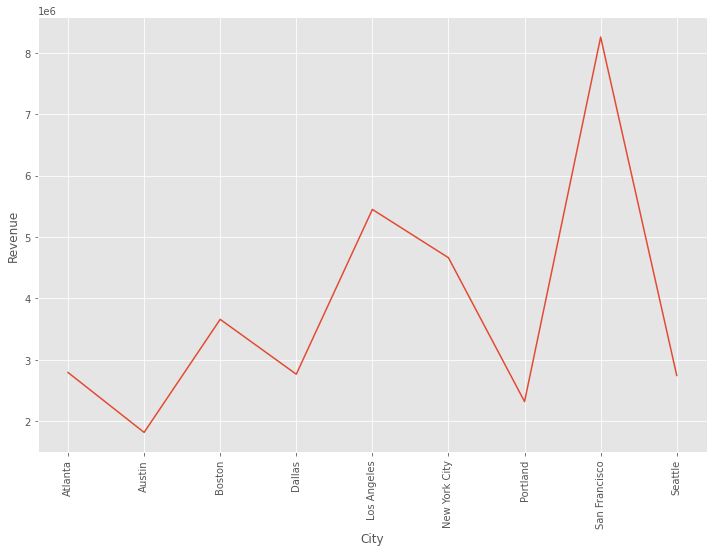

In [23]:
plt.plot(city_group.index,city_group['order price'])
plt.xticks(city_group.index , rotation = 90)
plt.xlabel('City')
plt.ylabel('Revenue')
plt.show()

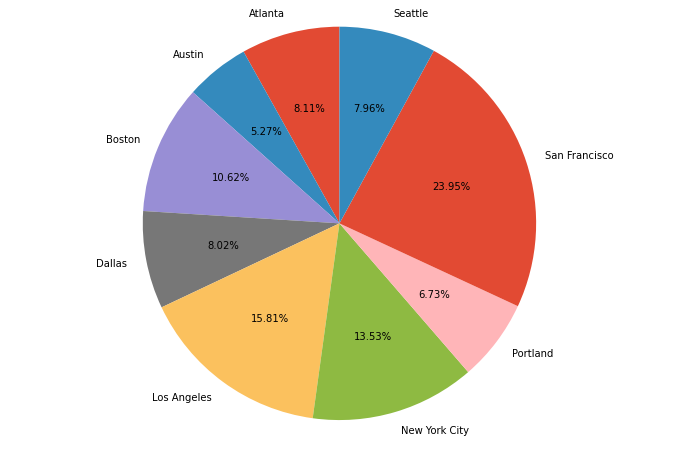

In [24]:
# San Francisco % revenue
plt.pie(city_group['order price'],labels=city_group.index, autopct='%1.2f%%',startangle=90)      
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
# The city generates more than 23% of the total revenue

**Q4:** What is the best time to show advertisement ?

In [25]:
hour_revenue = sales_dataframe.groupby(sales_dataframe['Order Date'].dt.hour).sum()

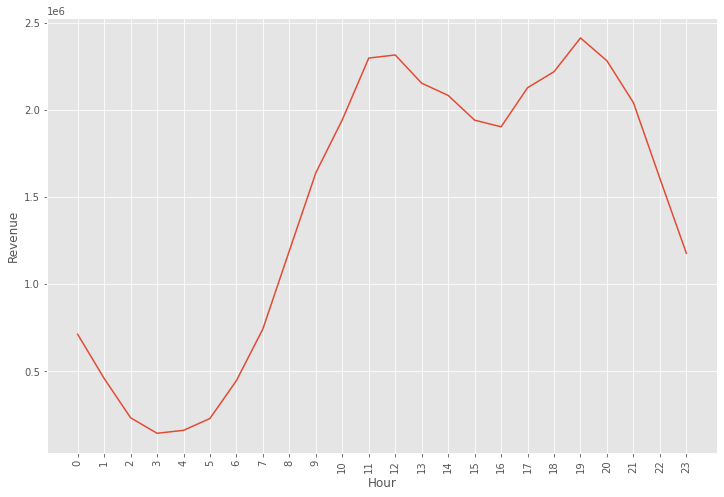

In [26]:
plt.plot(hour_revenue.index,hour_revenue['order price'])
plt.xticks(hour_revenue.index , rotation = 90)
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.show()

From the plot above we can say that to maximize our revenue we can show our advertisements before the peaks, so we might want to show advertisements at **10am** or **6pm** and by doing that more customers will see the advertisements and we will have higher chance of attracting them to buy our products.

**Q5:** Which Products are most sold together ?


In [27]:
dub = sales_dataframe[sales_dataframe['Order ID'].duplicated(keep=False)]
dub

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,street,city,state,zip,order price,month
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,11.99,4
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",20 Hill St,Los Angeles,CA,90001,600.00,4
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",20 Hill St,Los Angeles,CA,90001,11.95,4
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",365 Center St,San Francisco,CA,94016,5.98,4
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",106 7th St,Atlanta,GA,30301,3.84,9
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",241 Highland St,Atlanta,GA,30301,11.99,9
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",241 Highland St,Atlanta,GA,30301,5.98,9
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",519 Maple St,San Francisco,CA,94016,600.00,9


In [28]:
dub['grouped'] = dub.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [29]:
dub = dub[['Order ID','grouped']].drop_duplicates()

In [30]:
dub

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
186761,259277,"iPhone,Wired Headphones"
186783,259297,"iPhone,Lightning Charging Cable"
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [31]:
# counting the unique pairs in the list

from itertools import combinations
from collections import Counter

count = Counter()

for items in dub['grouped']:
    item_list = items.split(',')
    count.update(Counter(combinations(item_list, 2)))
    # the 2 defines how many unique elements we should combare together 
    # that basically means "We will return the most 2 common items sold together"
    
count.most_common(15)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58)]

And from that list we can figure out what items the customers tend to buy together so we can use it to recommend items to customers when they are going to purchase specific items.

In [36]:
#extracting The data so that we use it for visualization
sales_dataframe.to_parquet('SalesCleaned.parquet', index=False)